<h1>1.usa.gov data from bit.ly</h1><br>
<p>In 2011, URL shortening service bit.ly partnered with the United States government
website usa.gov to provide a feed of anonymous data gathered from users who shorten
links ending with .gov or .mil. As of this writing, in addition to providing a live feed,
hourly snapshots are available as downloadable text files.</p>
<p>In the case of the hourly snapshots, each line in each file contains a common form of
web data known as JSON, which stands for JavaScript Object Notation. For example,
if we read just the first line of a file you may see something like</p>

<h2> IMPORTING DATAS </h2>

In [50]:
import json
path = "../data book/pydata-book-master/ch02/usagov_bitly_data2012-03-16-1331923249.txt"
records = [json.loads(line) for line in open(path)]


In [51]:
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'al': 'en-US,en;q=0.8',
 'c': 'US',
 'cy': 'Danvers',
 'g': 'A6qOVH',
 'gr': 'MA',
 'h': 'wfLQtf',
 'hc': 1331822918,
 'hh': '1.usa.gov',
 'l': 'orofrog',
 'll': [42.576698, -70.954903],
 'nk': 1,
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 't': 1331923247,
 'tz': 'America/New_York',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991'}

In [52]:
records[0]['tz']

'America/New_York'

<h2> DATA'S MANIPULATION </h2>

In [53]:
timezones = [rec['tz'] for rec in records if 'tz' in rec]

In [54]:
timezones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [55]:
# counts by time zone - mode begginer
def get_counts(sequence):
    count = {}
    for x in sequence:
        if x in count:
            count[x] += 1
        else:
            count[x] = 1
    return count

In [56]:
# counts by tiem zone - mode advanced
from collections import defaultdict
def get_counts2(sequence):
    counts = defaultdict(int) # values will initialize to 0
    for x in sequence:
        counts[x] += 1
    return counts

In [57]:
counts = get_counts(timezones)


In [58]:
counts['America/New_York']

1251

In [59]:
# timezone's data size
len(timezones)

3440

In [60]:
# Top 10 time zones - mode begginer
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [61]:
top_counts(counts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [62]:
# Top 10 time zones - mode advanced
from collections import Counter
counts = Counter(timezones)

In [63]:
counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

<h2>USING PANDAS LIBRARY</h2>

In [64]:
%matplotlib inline 
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# visualing data

frame = DataFrame(records) # make one data frame table
frame

,_heartbeat_,a,al,c,cy,g,gr,h,hc,hh,kw,l,ll,nk,r,t,tz,u
0,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Danvers,A6qOVH,MA,wfLQtf,1.331823e+09,1.usa.gov,NaN,orofrog,"[42.576698, -70.954903]",1.0,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,1.331923e+09,America/New_York,http://www.ncbi.nlm.nih.gov/pubmed/22415991
1,NaN,GoogleMaps/RochesterNY,NaN,US,Provo,mwszkS,UT,mwszkS,1.308262e+09,j.mp,NaN,bitly,"[40.218102, -111.613297]",0.0,http://www.AwareMap.com/,1.331923e+09,America/Denver,http://www.monroecounty.gov/etc/911/rss.php
2,NaN,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,en-US,US,Washington,xxr3Qb,DC,xxr3Qb,1.331920e+09,1.usa.gov,NaN,bitly,"[38.9007, -77.043098]",1.0,http://t.co/03elZC4Q,1.331923e+09,America/New_York,http://boxer.senate.gov/en/press/releases/0316...
3,NaN,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,pt-br,BR,Braz,zCaLwp,27,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,"[-23.549999, -46.616699]",0.0,direct,1.331923e+09,America/Sao_Paulo,http://apod.nasa.gov/apod/ap120312.html
4,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,9b6kNl,MA,9b6kNl,1.273672e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
5,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"en-US,en;q=0.8",US,Shrewsbury,axNK8c,MA,axNK8c,1.273673e+09,bit.ly,NaN,bitly,"[42.286499, -71.714699]",0.0,http://www.shrewsbury-ma.gov/selco/,1.331923e+09,America/New_York,http://www.shrewsbury-ma.gov/egov/gallery/1341...
6,NaN,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",PL,Luban,wcndER,77,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,"[51.116699, 15.2833]",0.0,http://plus.url.google.com/url?sa=z&n=13319232...,1.331923e+09,Europe/Warsaw,http://www.nasa.gov/mission_pages/nustar/main/...
7,NaN,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,"bg,en-us;q=0.7,en;q=0.3",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
8,NaN,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,"en-US, en",None,NaN,wcndER,NaN,zkpJBR,1.331923e+09,1.usa.gov,NaN,bnjacobs,NaN,0.0,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,1.331923e+09,,http://www.nasa.gov/mission_pages/nustar/main/...
9,NaN,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",None,NaN,zCaLwp,NaN,zUtuOu,1.331923e+09,1.usa.gov,NaN,alelex88,NaN,0.0,http://t.co/o1Pd0WeV,1.331923e+09,,http://apod.nasa.gov/apod/ap120312.html


In [66]:
# 10 firsts time zones in frame
frame['tz'][:10]

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
5     America/New_York
6        Europe/Warsaw
7                     
8                     
9                     
Name: tz, dtype: object

In [67]:
# counts by time zone - mode pandas
tz_counts = frame['tz'].value_counts()

In [68]:
# Top 10 time zones - mode pandas
tz_counts[:10]

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

<h2>Munging</h2>

In [69]:
clean_tz = frame['tz'].fillna('Missing') # fill dataset blank spaces index with word 'Missing' (NA)
clean_tz[clean_tz == ''] = 'Unknown' # fill data's blank spaces (Empty strings)
tz_counts = clean_tz.value_counts()
tz_counts[:10]

America/New_York       1251
Unknown                 521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Missing                 120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

<h2> Ploting</h2>

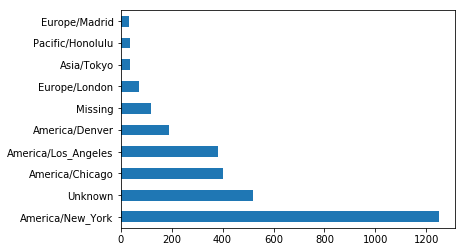

In [70]:
# Making a horizontal bar plot
tz_counts[:10].plot(kind='barh', rot=0)  # rot == angle

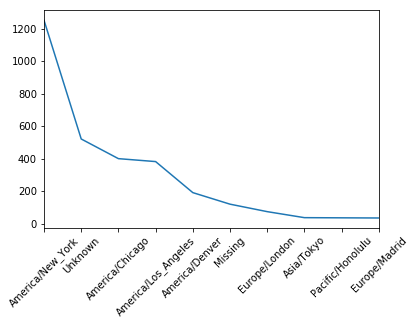

In [71]:
# Making a vertical line plot
tz_counts[:10].plot(kind='line', rot=45)  # rot == angle

<h2>Exploring more datas</h2>

<p>Information about the browser, device,
or application used to perform the URL shortening</p>

In [72]:
frame['a'][:60:10]

0     Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
10    Mozilla/5.0 (Windows NT 6.1; WOW64; rv:10.0.2)...
20    Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...
30    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
40    Mozilla/5.0 (iPhone; CPU iPhone OS 5_1 like Ma...
50    Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/...
Name: a, dtype: object

In [73]:
# make one serie 
results = Series([x.split()[0] for x in frame.a.dropna()])

In [74]:
results[:10]

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
8                Opera/9.80
9               Mozilla/5.0
dtype: object

In [75]:
len(results)

3440

In [76]:
# count by browser in results
results.value_counts()[:10]

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Dalvik/1.4.0                   3
BlackBerry8520/5.0.0.592       3
dtype: int64

In [77]:
# finding windows' users (operating system)
cframe = frame[frame.a.notnull()]
operating_system = np.where(cframe['a'].str.contains('Windows'),'Windows', 'Not Windows')

In [78]:
operating_system[:5]

array(['Windows', 'Not Windows', 'Windows', 'Not Windows', 'Windows'], 
      dtype='<U11')

In [79]:
by_tz_os = cframe.groupby(['tz', operating_system]) # group the data by its time zone
agg_counts = by_tz_os.size().unstack().fillna(0) #  reshaped


In [80]:
agg_counts[:10]

,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [81]:
# select the top overall time zones
indexer = agg_counts.sum(1).argsort() # Use to sort in ascending order

In [82]:
indexer[:10]

tz
                                  24
Africa/Cairo                      20
Africa/Casablanca                 21
Africa/Ceuta                      92
Africa/Johannesburg               87
Africa/Lusaka                     53
America/Anchorage                 54
America/Argentina/Buenos_Aires    57
America/Argentina/Cordoba         26
America/Argentina/Mendoza         55
dtype: int64

In [83]:
# select the rows in that order, slice off the last 10 rows
count_subset = agg_counts.take(indexer)[-10:]
count_subset


,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


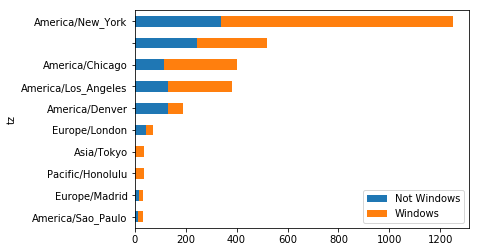

In [84]:
# shown in the preceding code block
count_subset.plot(kind='barh', stacked=True)

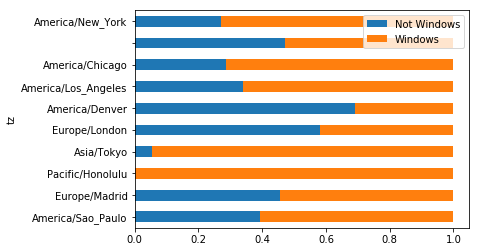

In [85]:
# relative percentage of Windows users

normed_subset = count_subset.div(count_subset.sum(1), axis=0)
normed_subset.plot(kind='barh', stacked=True)

<h1>2.MovieLens 1M Data Set</h1><br>
<p>Data provides a number of collections of movie ratings data collected from users of MovieLens (http://www.grouplens.org/node/73) in the late 1990s and early 2000s.The data provide movie ratings, movie metadata (genres and year), and demographic data about the users (age, zip code, gender, and occupation). Such data
is often of interest in the development of recommendation systems based on machine
learning algorithms.</p>

<h3>Have be careful</h3>
<p>The MovieLens 1M data set contains 1 million ratings collected from 6000 users on
4000 movies. It’s spread across 3 tables: ratings, user information, and movie infor-
mation.</p>

In [86]:
# import the lib pandas
import pandas as pd

<h2> DATA'S MANIPULATION </h2>

In [87]:
# make one list for be user data's header
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

# read data for pandas. Caution: I did change the sep='::' by sep=';' in my data. 
# If you will used data origin, pay attention in this place.
users = pd.read_table('../data book/pydata-book-master/ch02/movielens/users.dat', sep=';', header=None, names=unames)

In [88]:
# showing the first five to verify if be right
print('size of users=',len(users))
users.head()

size of users= 6040


,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [89]:
# make one list for be rating data's header
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

# Pay attention in parameter sep=';'. I did change like I did with user's data.
# Pay attention to in hardercode path.
ratings = pd.read_table('../data book/pydata-book-master/ch02/movielens/ratings.dat', sep=';', header=None, names=rnames)

In [90]:
# showing the first five to verify if be right
print('size of ratings=',len(ratings))
ratings.head()

size of ratings= 1000209


,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [91]:
# make one list for be movie data's header
mnames = ['movie_id', 'title', 'genres']

# Pay attention in parameter sep=';'. I did change like I did with both user's and rating's data.
# Pay attention to in hardercode path.
# I had one error when I tried to open file by pandas read_table method becuse encoding was differnt to 'utf8'
# The solution was change the encoding to 'latin-1'
movies = pd.read_table('../data book/pydata-book-master/ch02/movielens/movies.dat', sep=';', header=None, names=mnames, encoding='latin-1')

In [92]:
# showing the first five to verify if be right
print('size of movies=',len(movies))
movies.head()

size of movies= 3883


,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


<h2>Exploring data</h2>

In [93]:
# I'll want to compute mean ratings for a particular movie by sex and age.
# Then, I first merge ratings with users then merging that result with the movies data.
data = pd.merge(pd.merge(ratings, users), movies)

In [94]:
# showing the first five to verify if be right
print('size of data merge=',len(data)) # same size of ratings
data.head()

size of data merge= 1000209


,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [95]:
# Now, I get mean movie ratings for each film grouped by gender.
# I'll use the pivot_table method.
mean_ratings = data.pivot_table('rating', index=['title'], columns=['gender'], aggfunc=np.mean)

In [96]:
# showing the first five to verify if be right
print('size of mean_ratings=',len(mean_ratings))
mean_ratings.head()

size of mean_ratings= 3706


gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [97]:
# Now, I’m going to filter down to movies that received at least 250 ratings.
ratings_by_title = data.groupby('title').size()

In [98]:
# showing the first ten to verify if be right
print('size of ratings_by_title=',len(ratings_by_title))
ratings_by_title.head(10)

size of ratings_by_title= 3706


title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [99]:
active_titles = ratings_by_title.index[ratings_by_title >= 250]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '2 Days in the Valley (1996)',
       '20,000 Leagues Under the Sea (1954)', '2001: A Space Odyssey (1968)',
       '2010 (1984)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1216)

In [100]:
# The index of titles receiving at least 250 ratings can then be used to select rows from mean_ratings above
mean_ratingsIX = mean_ratings.loc[active_titles]
mean_ratingsIX[:10]

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
"13th Warrior, The (1999)",3.112000,3.168000
2 Days in the Valley (1996),3.488889,3.244813
"20,000 Leagues Under the Sea (1954)",3.670103,3.709205
2001: A Space Odyssey (1968),3.825581,4.129738


In [101]:
# To see the top films among female viewers, I'll sort by the F column in descending order.
top_female_ratings = mean_ratingsIX.sort_values(by='F', ascending=False)
top_female_ratings[:10]

gender,F,M
title,,
"Close Shave, A (1995)",4.644444,4.473795
"Wrong Trousers, The (1993)",4.588235,4.478261
Sunset Blvd. (a.k.a. Sunset Boulevard) (1950),4.572650,4.464589
Wallace & Gromit: The Best of Aardman Animation (1996),4.563107,4.385075
Schindler's List (1993),4.562602,4.491415
"Shawshank Redemption, The (1994)",4.539075,4.560625
"Grand Day Out, A (1992)",4.537879,4.293255
To Kill a Mockingbird (1962),4.536667,4.372611
Creature Comforts (1990),4.513889,4.272277


<h2>Measuring rating disagreement</h2>

In [102]:
# finding the movies that are most divisive between male and female viewers.
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']

# sorted by disagreemnt
sorted_by_diff = mean_ratings.sort_values(by='diff')

In [103]:
# showing the first ten to verify if be right
sorted_by_diff[:10]

gender,F,M,diff
title,,,
"James Dean Story, The (1957)",4.000000,1.000000,-3.000000
Country Life (1994),5.000000,2.000000,-3.000000
"Spiders, The (Die Spinnen, 1. Teil: Der Goldene See) (1919)",4.000000,1.000000,-3.000000
Babyfever (1994),3.666667,1.000000,-2.666667
"Woman of Paris, A (1923)",5.000000,2.428571,-2.571429
Cobra (1925),4.000000,1.500000,-2.500000
"Other Side of Sunday, The (Søndagsengler) (1996)",5.000000,2.928571,-2.071429
"To Have, or Not (1995)",4.000000,2.000000,-2.000000
For the Moment (1994),5.000000,3.000000,-2.000000


In [104]:
# I do want know what movies are more preferred by men that women didn’t rate as highly.
sorted_by_diff[::-1][:15]

gender,F,M,diff
title,,,
Zero Kelvin (Kjærlighetens kjøtere) (1995),NaN,3.500000,NaN
Zachariah (1971),NaN,3.500000,NaN
Year of the Horse (1997),NaN,3.250000,NaN
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000,NaN
With Friends Like These... (1998),NaN,4.000000,NaN
With Byrd at the South Pole (1930),NaN,2.000000,NaN
Wings of Courage (1995),NaN,3.000000,NaN
Windows (1980),NaN,1.000000,NaN
Wild Bill (1995),NaN,3.146341,NaN


In [105]:
# Now, I'd wanted the movies that elicited the most disagreement among viewers, independent of gender.
# Standard deviation of rating grouped by title.
rating_std_by_title = data.groupby('title')['rating'].std()

# Filter down to active_titles
rating_std_by_title = rating_std_by_title.loc[active_titles]

# Series by value in descending order
rating_std_by_title.sort_values(ascending=False)[:10]

title
Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

<h2>US Baby Names 1880-2016</h2>

<p>The United States Social Security Administration (SSA) has made available data on the
frequency of baby names since 1880 for 2016. These data files can be obtained here:<a>https://www.ssa.gov/oact/babynames/limits.html</a></p></br>
<h4>what do we do?</h4></br>
<p>There many things, we might want to do with the data set:</p>
<ol>
  <li>Verify the total birth by gender in each year.</li>
  <li>Visualize the proportion of babies given a particular name (your own, or another name) over time.</li>
  <li>Determine the relative rank of a name.</li>
  <li>Determine the most popular names in each year or the names with largest increases or decreases.</li>
  <li>Analyze external sources of trends: biblical names, celebrities, demographic changes.</li>
  <li>Many others things.</li>
</ol>

<h4>Let's go to data</h4>

In [129]:
# I used the UNIX head command to look at the first 10 lines of one of the files.
!head -n 10 '../data book/pydata-book-master/ch02/names/yob1880.txt'

Mary,F,7065
Anna,F,2604
Emma,F,2003
Elizabeth,F,1939
Minnie,F,1746
Margaret,F,1578
Ida,F,1472
Alice,F,1414
Bertha,F,1320
Sarah,F,1288


In [130]:
# Using padas for read data.
# make one list for be user data's header
ubabys = ['name', 'sex', 'births']

# read data for pandas.
names1880 = pd.read_csv('../data book/pydata-book-master/ch02/names/yob1880.txt', names= ubabys)

In [132]:
# showing the first ten to verify if be right
names1880.head(10)

,name,sex,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [134]:
# Now, we grouping total births by sex 
names1880.groupby('sex').births.sum()

sex
F     90992
M    110491
Name: births, dtype: int64

<h4>Concat data from some archives for one archive</h4>

In [136]:
# Now, we'll go togeth all of the data into a single DataFrame and further to add a year field, using pandas.

# make one range for new column of the data. 2016 is the last available year right now.
years = range(1880, 2016)


In [155]:
files = [] # list for save archive data
columns = ['name', 'sex', 'births'] # list for header.

In [156]:
# for each year (1880 for 2016) read one file.
for year in years:
    path = '../data book/pydata-book-master/ch02/names/yob%d.txt' % year 
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year # add new column.
    files.append(frame) # add file in files list.

In [163]:
# showing the first five to verify if be right
files[:2]

[           name sex  births  year
 0          Mary   F    7065  1880
 1          Anna   F    2604  1880
 2          Emma   F    2003  1880
 3     Elizabeth   F    1939  1880
 4        Minnie   F    1746  1880
 5      Margaret   F    1578  1880
 6           Ida   F    1472  1880
 7         Alice   F    1414  1880
 8        Bertha   F    1320  1880
 9         Sarah   F    1288  1880
 10        Annie   F    1258  1880
 11        Clara   F    1226  1880
 12         Ella   F    1156  1880
 13     Florence   F    1063  1880
 14         Cora   F    1045  1880
 15       Martha   F    1040  1880
 16        Laura   F    1012  1880
 17       Nellie   F     995  1880
 18        Grace   F     982  1880
 19       Carrie   F     949  1880
 20        Maude   F     858  1880
 21        Mabel   F     808  1880
 22       Bessie   F     796  1880
 23       Jennie   F     793  1880
 24     Gertrude   F     787  1880
 25        Julia   F     783  1880
 26       Hattie   F     769  1880
 27        Edith   F

In [160]:
# Concatenate everything into a single DataFrame
names = pd.concat(files, ignore_index=True)

In [166]:
# showing the first ten to verify if be right
names.head(10)

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


<h4>Manipuling data and solving the asks</h4></br>

<h4>1. Verify the total birth by gender in each year.</h4>
<p>Now, we can already start aggregating the data at the year and sex level. We can do this by groupby or pivot table.</p>

In [224]:
# Here we use grpou table for grouping data.
total_births = names.groupby(['year', 'sex']).births.sum()
total_births.tail()

year  sex
2013  M      1885683
2014  F      1779496
      M      1913434
2015  F      1776538
      M      1907211
Name: births, dtype: int64

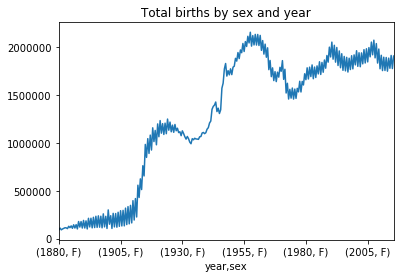

In [226]:
# plotting data for better view.
total_births.plot(title='Total births by sex and year')

In [227]:
# Here we use pivot table for grouping data.
total_births = names.pivot_table('births', index='year',columns='sex', aggfunc=sum)
total_births.tail()

sex,F,M
year,,
2011,1755278,1895156
2012,1756347,1892094
2013,1749061,1885683
2014,1779496,1913434
2015,1776538,1907211


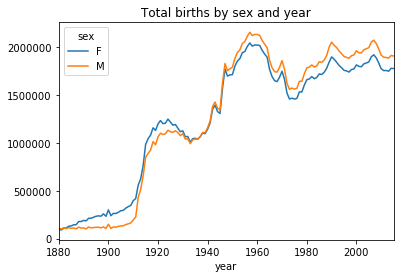

In [228]:
# plotting data for better view.
total_births.plot(title='Total births by sex and year')

<h4>2. Visualize the proportion of babies given a particular name (your own, or another name) over time.</h4>
<p>Now, we group the data by year and sex, then add the new column to each group. For this we do make one function because we would used before.</p>

In [229]:
# function for add do fraction of babies names relative to the total number of births.
def add_prop(group):
    # Integer division floors
    births = group.births.astype(float) # get births e change field for float type.
    group['prop'] = births / births.sum() # add field prop in group.
    return group

In [230]:
# Now, we are going to add field 
names = names.groupby(['year', 'sex']).apply(add_prop)

In [231]:
# showing the first five. The function groupby had already ordened.
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077644
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021310
4,Minnie,F,1746,1880,0.019189


In [232]:
# Checking sum of the prop is equals 1, for verify if funcfion 'add_prop' was made right = return True or mistake = return False.
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [235]:
# Now that this is done, I’m going to extract a subset of the data to facilitate further analysis.
def get_top1000(group):
    return group.sort_values(by='births', ascending=False)[:1000]

In [236]:
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)

In [250]:
top1000[-1:]

,,,name,sex,births,year,prop
year,sex,,,,,,
2015,M,1846013,Ayan,M,204,2015,0.000107


<h4>Analyzing Naming Trends</h4>